<a href="https://colab.research.google.com/github/alisonsoong/NASA-SEES-Internship-2021/blob/main/EP_SEES_5_Simulated_Disk_Activity_Soong_Alison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alison Soong, EP, Emergency Preparedness
CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2021 SEES.   

In this activity, you are going to simulate the disk of Andromeda! 

You'll begin with a different step than what is shown in the UCSC ***Session3A_Notebook5.mp4*** video. You need to do this because Colab notebooks need help in order to read files that are stored on your local laptop or desktop. The steps are similar to what you have seen before while reading in the star text (*.txt*) files. The difference in this case is that your code instructs this notebook to read a Python file named ***fakedisk.py***. 

*fakedisk* is the program that will generate the simulated disk mentioned in the title of this notebook.

*.py* files are Python scripts, collection of code in the Python language, just like the lines of code that you are running in notebook code cells. If you are curious, you can open ***fakedisk.py*** in a text editor (or a Python editor) to see what the script does and how it is written. Just be careful not to change anything when you do that.

When you run the next code cell, you will be directed to **Choose files**. This is your cue to add ***fakedisk.py*** (NOT *fakedisk.pyc*) from the programs subfolder in the SIP folder that you downloaded from Basecamp. Pay attention to the comments in the next code cell. Do not edit.

In [ ]:
from google.colab import files  # read in the files package
src = list(files.upload().values())[0] # Choose fakedisk.py from your computer
open('fakedisk.py','wb').write(src) # This command saves the fakedisk code
import fakedisk # finally, import the code as a package
from fakedisk import fakedisk # import a part of the fakedisk package, same name


Saving fakedisk.py to fakedisk.py


*There is more than one way to import python programs and other files into a Colab notebook. Researching different ways and writing a new Colab notebook to demonstrate how to do this task is a great idea for an **Extra Credit** Python Certificate project.*

Continue in the next code cell, as in previous notebooks, by importing the other key programs. *matplotlib* and *numpy* should be familar to you at this point.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The following routine makes a plot of the simulated disk. Run this cell. Remember - since the cell creates a new function, *show_map*, you won't see any output.

In [ ]:
def show_map(sim, quantity, label, vmin=-200, vmax=200, cutout=False): 
    ax = plt.axes(aspect = 'equal')
    
    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Simulation')
    ax.set_xlim(1.2 * max(sim.x), 1.2 * min(sim.x))

    if cutout:
        #clip into "mystery cutout" 
        sideL  = 0.25 * sim.scaleFactor
        ax.set_xlim(sideL, -sideL)
        ax.set_ylim(-sideL, sideL)
        
    tt = ax.scatter(sim.x, sim.z, c=quantity, edgecolors='none', s=2, vmin=vmin, vmax=vmax)

    plt.colorbar(tt, label = label)

Now, we'd like to create our fake disk! This occurs below when the program *fakedisk* is called. 

Again - no output after you run the next code cell. Do you understand why?

In [ ]:
scale_factor = 20. #Scale length of the disk, radius of disc in kpc (3260 light years)
dispersion = 100.    #Dispersion in the layer, intrinsic radial dispersion
# changing how coherent the motion of stars is. Are all the stars moving together as a well-ordered system, or are the stars relatively disordered? That is what dispersion is measuring
incl=77. #Inclination (degrees) - the angle between two lines: the line connecting us and the center of the plane, and the line that is perpendicular to the plane
# 0 = face on; 90 = edge on
pa0=37.7 #Position Angle of major axis (in degrees)
vrot=200. # rotational speed, how fast the galaxy is rotating
n=50000 # number of points/stars included
new_sim = fakedisk(N=n, incl=incl, pa0=pa0, v=vrot, scaleFactor=scale_factor, shape='constant',
               dispersion=dispersion)

## Why is there no output after you run the preceding code block?
Type your answer here for notebook credit.

Because nothing is being printed nor plotted. The only way to plot something at this point would be to do plt.scatter(,..) or plt.plot(...) or ax.plot(...) or ax.scatter(...) something similar, and no print statements are included yet. This would only happen if show_map() is called, but it hasn't been called yet. Therefore, because all that's being done is assigning values to variables (which will be used later on to generate a plot— but not in this code cell), nothing is being outputted in this code cell.

## Generate plots of your simulated velocity field below. 

Once you've made these plots, go back and change the following parameters to see what they mean.
Think about what happens when you change:
*   the scale factor
*   The dispersion
*   The inclination (incl)
*   The position angle (pa0)
*   N?

Can you guess what these different parameters are referring to? 

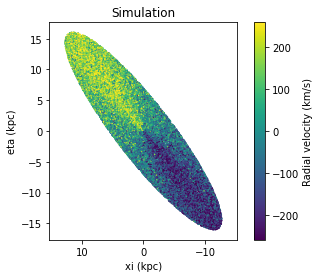

In [ ]:
#Generate velocity map
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax) 


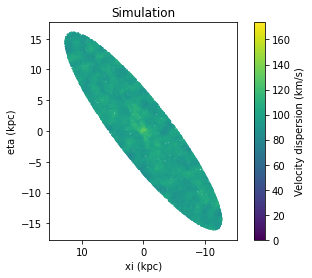

In [ ]:
#Generate dispersion map using 200'' smoothing circle.
arcsec2kpc = (13.67/3600.) #conversion factor
sigma = np.zeros(len(new_sim.x)) #an array of zeroes that will contain velocity dispersion
sig_sv = np.zeros(len(new_sim.x))
smoothingCircle = 200. * arcsec2kpc
for i in range(len(sigma)): # it takes the neighbors and looks at what the group's deviation is (very different velocities?)
    sigma[i], sig_sv[i] = new_sim.get_sv(i, smoothingCircle)
show_map(new_sim, sigma, 'Velocity dispersion (km/s)', vmin=0, vmax=1.3*np.max(sigma))

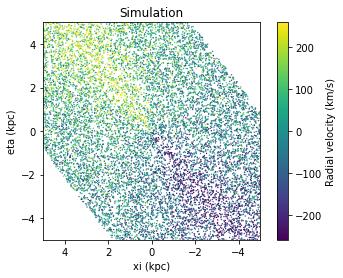

In [ ]:
#Also generate a little square cutout velocity map.
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax, cutout=True)

Now that you're familiar with the parameters and the figures, change the parameters for *fakedisk* to answer the following questions. 

## ATTENTION! 
*For the purposes of SEES Lesson 2, getting the astronomy answers right is not crucial. It's more important that you understand how to adjust code variables and parameters to explore research questions. However, we do ask that you attempt answers*

You can double click on this cell and type your answers below the questions:

1) If galaxies A and B have the same geometry, but galaxy A has twice the rotation speed of galaxy B, how do the velocity fields differ on the major axis? On the minor axis? In between?

> The minor axis would not change because the velocity at those points should be around 0 (since they are not moving away or towards us). However, the velocity fields would become more extreme/2 times larger on the major axis (either a velocity that is two times faster away or towards us) because increasing the rotation speed by a factor of 2 would increase the velocity of those points/stars (as they move towards us or away from us). In between, there would still be that gradiation from 0 (at the minor axis) to that high speed (at the major axis). However, I don't think that it would cause this gradiation to be noticeably different— the only difference would be the range of the gradiation (from 0 to a higher value/speed).

2) If galaxies C and D have the same PA and rotation speed, but galaxy C has an inclination half that of D, how do the velocity fields differ?

> Galaxy C would be on a disc that is facing more towards us compared to galaxy D, and thus it's ellipse would look more circular. However, because the plane that Galaxy C is flatter to us, it would make the particles/stars actually have lower velocities (and thus have lower velocities towards us or away from us) because they would not be travelling as much on the Z plane (and would have more of a velocity that is more on the Y plane).

3) If galaxies E and F have the same inclination and rotation speed, but galaxy E’s major axis position angle is the negative of galaxy F’s, how do the velocity fields differ?

> It would seem like the particles in galaxy E would be moving in the opposite direction of the particles in galaxy F (one would seem clockwise while the other would seem counterclockwise). This is because negating the major axis position angle would almost flip the galaxy. Therefore, the velocity fields would also be flipped. In terms of magnitude, I don't think the velocity field would change, but the directions should be inverted.




### The following questions are thought experiments. Answer if inspired...
What PA, inclination, velocity, and/or disk radius would make it easiest to study the properties of a real galaxy? 

> I'm not sure what the most ideal PA, inclination, velocity, and disk radius would be, but I do know that having both the inclination and position angle (PA) equal to 0 degrees would make the galaxy face on and  wouldn't give any information about the velocity of the particles (because it's determined by it's movement away or towards us). Therefore, PA = 0 and incl = 0 would not be ideal. Also, a too low velocity for the rotation of the galaxy would NOT be ideal, because then the data/velocity would be too specific for each star and the direction of the galaxy's rotation would be nearly impossible to discern.

What parameters most closely reproduce M31‘s velocity map that you made last time?

> Perhaps:
scale_factor = 20.,
dispersion = 100., 
incl=66.,
pa0=37.7,
vrot=200., and
n=50000


# Preparing for Advanced Level Certificate
When you have successfully completed the code that plots the requested maps, you can prepare this notebook for submission. Also be sure to answer questions asked in the appropriate text cells. Your answers demonstrate that you've attempted to interpret the science data. They will not be scored.

Overwrite the title text in the **CREDIT text block** at the top of the notebook. Write **your full name**, **your team code**, and **your specific team name** in the text block instead.

Make sure that your saved notebook shows your output by running all code cells.

Copy or rename notebook 5 in this way:

*   *team code_*SEES 5-Simulated Disk Activity*_last name_first name*.ipynb where:

1.   *team code* is your 2 character SEES team code
2.   *last name* is your last name, and
3.   *first name* is your first name

For example, a team mentor for SEES would name her notebook *EP_SEES 5-Simulated Disk Activity_Howard_Teresa.ipynb*.

Follow the directions in Basecamp to submit your notebook.